In [1]:
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
def draw_network(filename):
    f = open(filename, "r")
    lines =[]
    scene_delimiter = '#'
    weight_delimiter = '\t'
    node_delimiter = '-'
    temp_line = ''

    nodes = []
    edges = []
    weights = []

    temp_lines = f.readlines()

    for line in temp_lines:
        if line[-1] == '\n':
            lines.append(line[:-1])
        else:
            lines.append(line)


    f.close()


    # make Graph information
    for line in lines:
        if '\t' in line:
            temp = line.split(weight_delimiter)
            temp_nodes = temp[0]
            temp_weight = temp[1]

            # add node
            temp_nodes = temp[0].split(node_delimiter)
            temp_node1 = temp_nodes[0]
            temp_node2 = temp_nodes[1]
            nodes.append(temp_node1)
            nodes.append(temp_node2)

            # add edge
            temp_edge = (temp_node1, temp_node2)
            edges.append(temp_edge)

            # add weight
            weights.append(temp_weight)

    # 중복 node 제거
    temp_set = set(nodes)
    nodes = list(temp_set)

    G = nx.Graph()
    G.add_nodes_from(nodes)
    
    color_list = ['r', 'g', 'b']
    
    for i in range(len(edges)):
        G.add_edge(edges[i][0], edges[i][1], weight=weights[i], color=color_list[i%3])
    
    colors = [G[u][v]['color'] for u,v in edges]
    weights = [G[u][v]['weight'] for u,v in edges]
    
    nx.draw_shell(G, with_labels=True, node_size=100,font_weight='bold', font_size=10, edge_color=colors, width=weights, font_family='sans-serif')

    print(G.nodes.data())

[('ANGEL DUST', {}), ('AJAX', {}), ('DOPINDER', {}), ('COLOSSUS', {}), ('WEASEL', {}), ('DEADPOOL', {}), ('VANESSA', {}), ('WADE', {})]


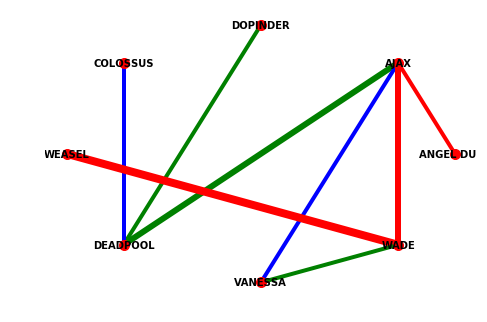

In [7]:
draw_network("./output/deadpool4.txt")

[('SUMMER', {}), ('RACHEL', {}), ('MCKENZIE', {}), ('TOM', {}), ('PAUL', {})]


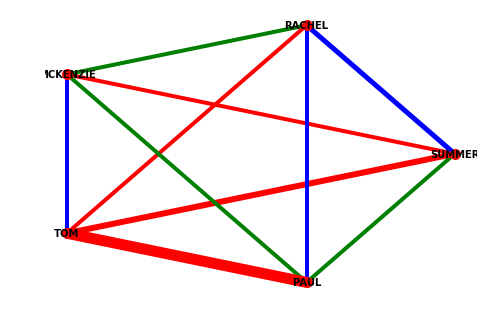

In [8]:
draw_network("./output/500 DAYS OF SUMMER4.txt")

[('REISS', {}), ('ROZ', {}), ('JAMESON', {}), ('AUNT MAY', {}), ('OCK', {}), ('THORKEL', {}), ('LIZ', {}), ('PETER', {}), ('HARRY', {}), ('WEINER', {}), ('FLASH', {}), ('KIM', {})]


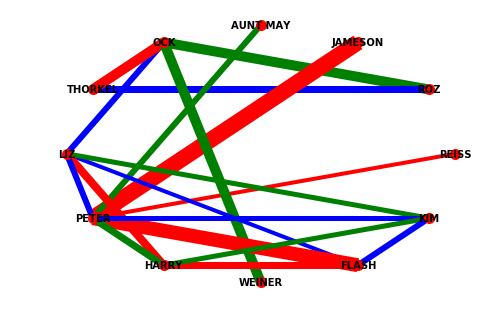

In [9]:
draw_network("./output/Spider_man4.txt")

[('REISS', {}), ('ROZ', {}), ('OCK', {}), ('THORKEL', {}), ('LIZ', {}), ('PETER', {}), ('HARRY', {}), ('WEINER', {}), ('FLASH', {}), ('KIM', {})]


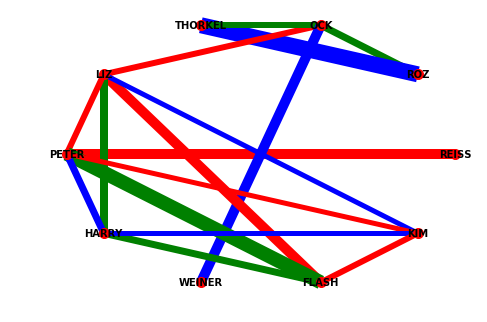

In [10]:
draw_network("./output/Spider_man5.txt")

# node size 추가

In [150]:
def draw_network2(filename):
    f = open(filename, "r")
    lines =[]
    scene_delimiter = '#'
    weight_delimiter = '\t'
    size_delimimter = '\t'
    node_delimiter = '-'
    temp_line = ''
    flag = 1
    
    nodes = []
    edges = []
    weights = []
    normalized_weights = []
    nodeSizes = []
    
    temp_lines = f.readlines()

    for line in temp_lines:
        if line[-1] == '\n':
            lines.append(line[:-1])
        else:
            lines.append(line)


    f.close()


    # make Graph information
    for line in lines:
        if line == 'NODE':
            flag = 0
            
        if '\t' in line:
            if flag != 0:
                temp = line.split(weight_delimiter)
                temp_nodes = temp[0]
                temp_weight = temp[1]

                # split node
                temp_nodes = temp[0].split(node_delimiter)
                temp_node1 = temp_nodes[0]
                temp_node2 = temp_nodes[1]

                # add edge
                temp_edge = (temp_node1, temp_node2)
                edges.append(temp_edge)
                temp_weight=float(temp_weight) * 10
                # add weight
                weights.append(temp_weight)
            else:
                # add node with size
                node_info = line.split(size_delimimter)
                nodes.append(node_info[0])
                size = float(node_info[1])
                nodeSizes.append(size)
          
    min_w = min(weights)
    max_w = max(weights)
#     print("min", min_w, " max", max_w)
#     print(weights)
    
    for weight in weights:
        normalized_weights.append((4*(weight - min_w)) / (max_w - min_w)  + 1)
    
#     print(normalized_weights)
    G = nx.Graph()

    color_list = ['r', 'g', 'b', 'lime', 'deeppink']
    
    for i in range(len(edges)):
        G.add_edge(edges[i][0], edges[i][1], weight=normalized_weights[i], color=color_list[i%len(color_list)])
    
    for i in range(len(nodes)):
        G.add_node(nodes[i], node_size=nodeSizes[i]*5)
    
#     temp_nodes = list(G.nodes)
#     temp_weight = list(G.edges.data())
    
    temp_nodes = G.nodes()
    temp_edges = G.edges()
    colors = [G[u][v]['color'] for u,v in temp_edges]
    normalized_weights = [G[u][v]['weight'] for u,v in temp_edges]
    nodeSizes = [G.nodes[u]['node_size'] for u in temp_nodes]
    
    #nx.draw_spring(G, with_labels=True, node_size=nodeSizes, font_weight='bold', font_size=10, edge_color=colors, width=normalized_weights, font_family='sans-serif')
    #nx.draw_kamada_kawai(G, with_labels=True, node_size=nodeSizes, font_weight='bold', font_size=10, edge_color=colors, width=normalized_weights, font_family='sans-serif')
    #nx.draw_circular(G, with_labels=True, node_size=nodeSizes, font_weight='bold', font_size=10, edge_color=colors, width=normalized_weights, font_family='sans-serif')
    #nx.draw_spectral(G, with_labels=True, node_size=nodeSizes, font_weight='bold', font_size=10, edge_color=colors, width=normalized_weights, font_family='sans-serif')
    nx.draw_shell(G, with_labels=True, node_size=nodeSizes, font_weight='bold', font_size=10, edge_color=colors, width=normalized_weights, font_family='sans-serif')


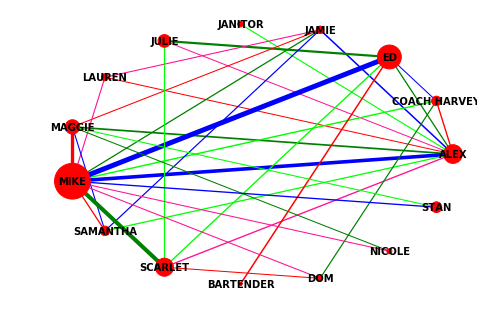

In [151]:
draw_network2("./output/17again.txt")

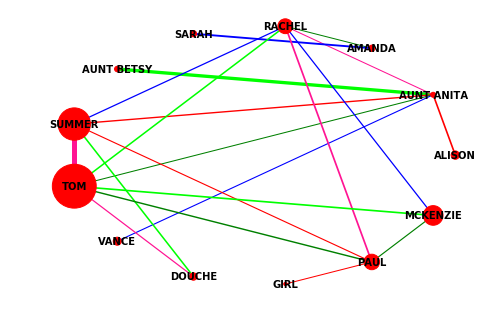

In [161]:
draw_network2("./output/500 DAYS OF SUMMER.txt")

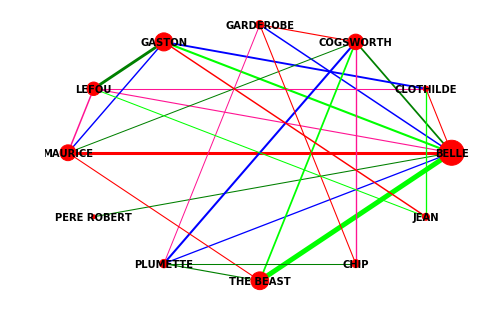

In [154]:
draw_network2("./output/Beauty and the Beast.txt")

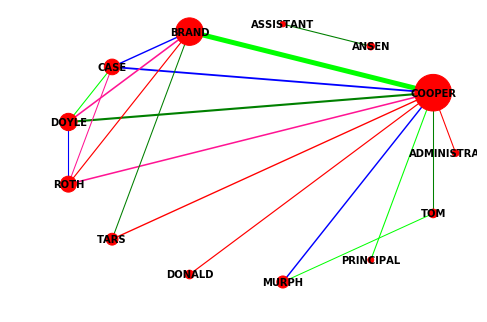

In [155]:
draw_network2("./output/Interstellar.txt")

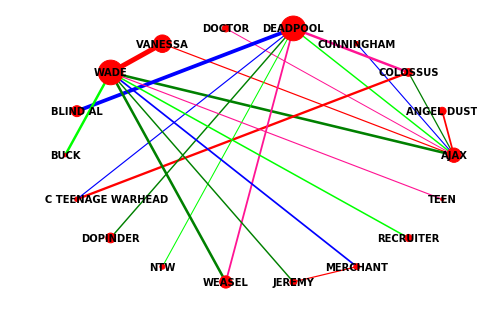

In [156]:
draw_network2("./output/Deadpool.txt")

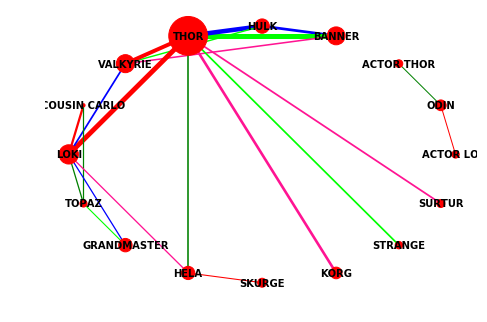

In [157]:
draw_network2("./output/Thor Ragnarok.txt")

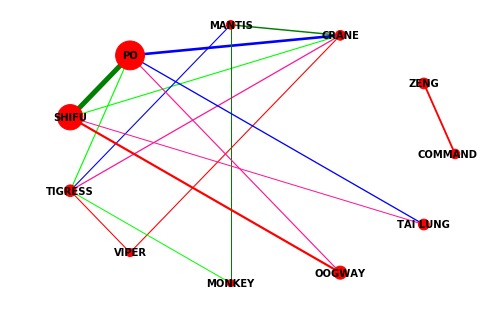

In [158]:
draw_network2("./output/Kung Fu Panda.txt")

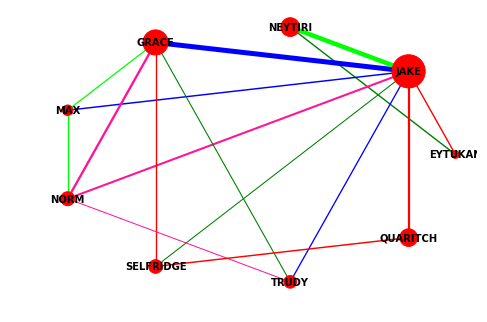

In [159]:
draw_network2("./output/avatar.txt")

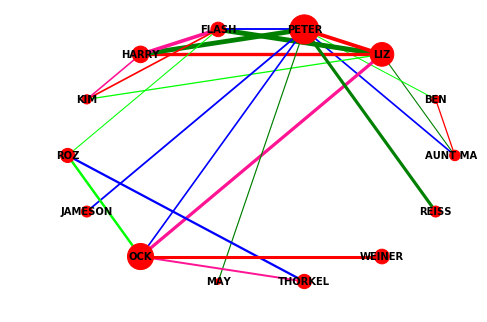

In [160]:
draw_network2("./output/Spider_man.txt")